# Heart Disease Prediction

Heart disease is one of the leading causes of death in Singapore. Accounting for about 31.4% of all deaths in 2022. In fact about 1 in 3 deaths in singapore is due to heart diseases or stroke (Singapore heart foundation, 2022). Hence, it is good to be able to predict the likelihood of someone having a heart disease so that they can take better care of themselves by seeking appropriate treatment to mitigate the effects of the disease and slow down the progression of the disease by allowing ample time for pharmaceutical intervention. (Wang et al., 2017)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
sb.set()

In [2]:
heart = pd.read_csv('train.csv')
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [3]:
heart.info()
heart.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


(1025, 14)

#### Legend
1. age: age in years
2. sex: sex
	1 = male
	0 = female
3. cp: chest pain type
	Value 0: typical angina
	Value 1: atypical angina
	Value 2: non-anginal pain
	Value 3: asymptomatic
4. trestbps: resting blood pressure (in mm Hg on admission to the hospital)
5. chol: serum cholestoral in mg/dl (serum cholestrol - healthy range : 125-200 mg/dl)
6. fbs: (fasting blood sugar > 120 mg/dl)
	1 = true;
	0 = false
7. restecg: resting electrocardiographic results
	Value 0: normal
	Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
	Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
8. thalach: maximum heart rate achieved
9. exang: exercise induced angina
	1 = yes
	0 = no
10. oldpeak = ST depression induced by exercise relative to rest
11. slope: the slope of the peak exercise ST segment
	Value 0: upsloping
	Value 1: flat
	Value 2: downsloping
12. ca: number of major vessels (0-3) colored by flourosopy
13. thal:
		0 = error (in the original dataset 0 maps to NaN's)
		1 = fixed defect
		2 = normal
		3 = reversable defect
14. target (the label):
		0 = no disease,
		1 = disease


## Cleaning the dataset
For the thalassemia coulumn, some individuals have missing data, denoted by the number '0', so we have to remove those rows.

In [4]:
heart = heart.drop(heart[heart['thal'] == 0].index)
heart.shape

(1018, 14)

## Linear regression
Checking for linear correlation between the variables and response, to find out which variables predict the chance of someone having heart disease the most

Here, only the continuous(i.e. numerical) variables are used to find a correlation value.

In [5]:
resp = pd.DataFrame(heart["target"])
factors = pd.DataFrame(heart[["age", "trestbps", "chol", "thalach", "oldpeak"]])

<Axes: >

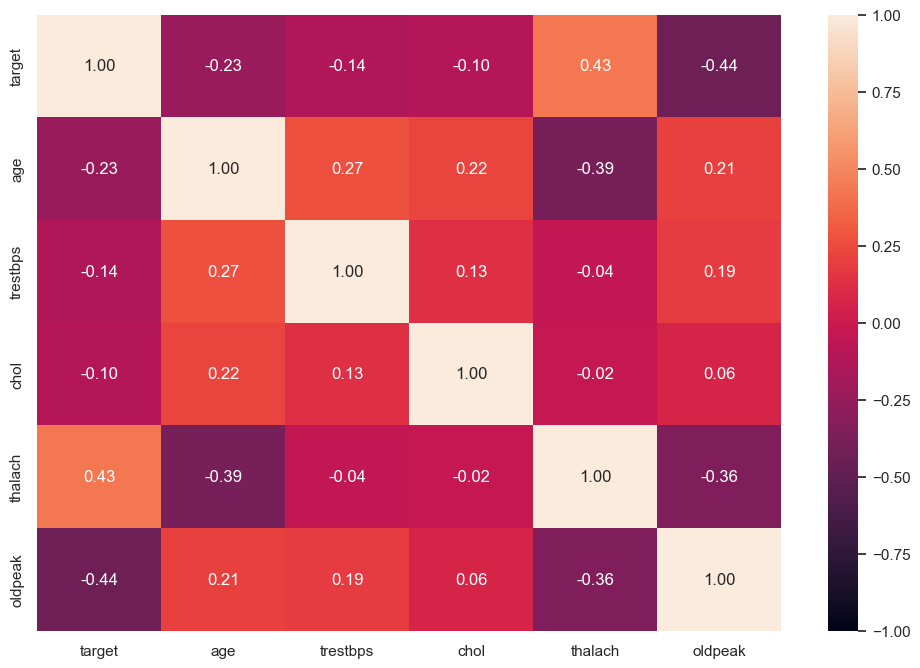

In [6]:
trainDF = pd.concat([resp, factors], axis = 1).reindex(resp.index)

f = plt.figure(figsize=(12, 8))
sb.heatmap(trainDF.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f")

Out of the numerical variables, thalach and oldpeak have the highest correlation values, so they are the variables which impact target most significantly.

## Categorical Variables
As for the categorical variables which cannot undergo linear regression, we will plot their different classes against the dependant variable 'target' and manually compare them to see whether they have an influence on it.

#### Sex of the individual:
	1 = male
	0 = female

<Axes: xlabel='target'>

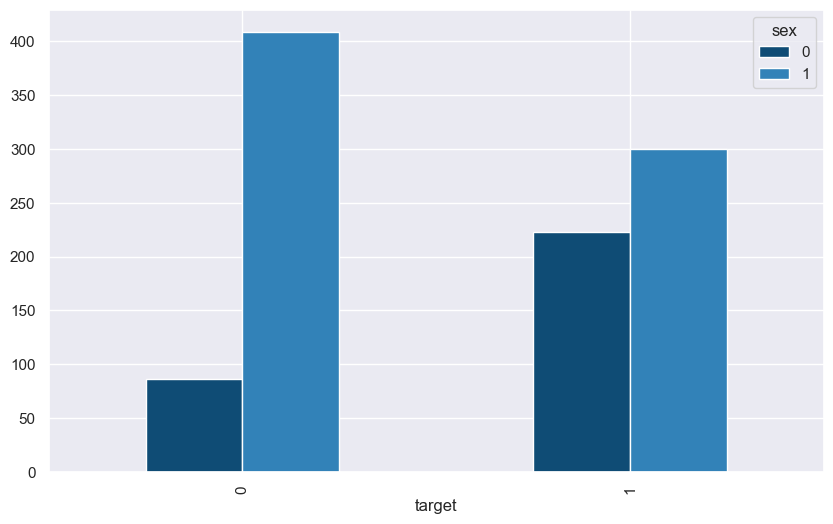

In [7]:
pd.crosstab(heart.target, heart.sex).plot(kind='bar',
                                   figsize=(10,6),
                                   color=['#0F4C75','#3282B8'])

As there is a significant difference in the counts of males and females having heart disease, we can say that gender indeeds affect one's probability of having heart disease.

From this dataset, it seems that females are more prone to heart disease than males.

#### Chest Pain Type : 

    0: typical angina
    1: atypical angina
    2: non-anginal pain
    3: asymptomatic

<Axes: xlabel='target'>

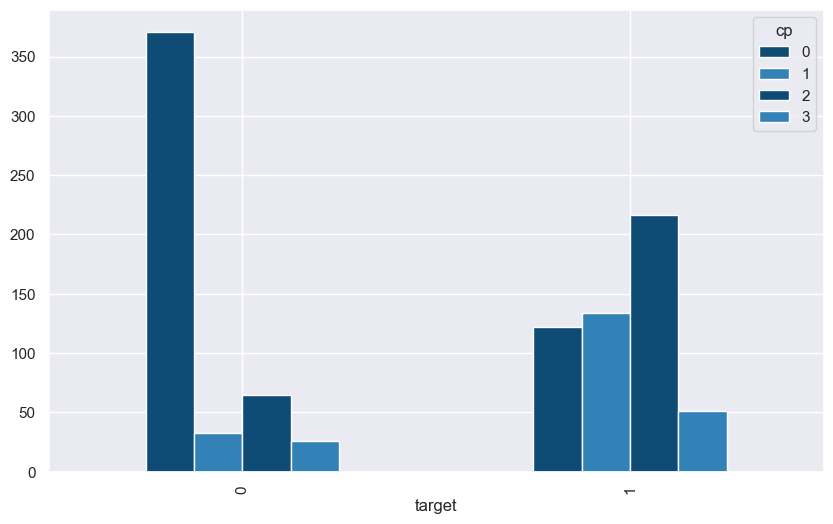

In [8]:
pd.crosstab(heart.target, heart.cp).plot(kind='bar',
                                   figsize=(10,6),
                                   color=['#0F4C75','#3282B8'])

There is a significant difference in graphs and the counts of having heart disease varies with each symptom.

From this dataset, it seems that non-anginal pain actually has the highest number of heart disease patients.

However, upon deeper analysis, we can see that within asymptomatic patients, the majority have relayed that they indeed have heart disease despite the lack of symptoms. This shows that the type of chest-pain may be a misleading factor when it comes to predicting heart disease, as both having symptoms or not have a higher chance of having heart disease.

#### fbs: (fasting blood sugar > 120 mg/dl)
	1 = true
	0 = false

<Axes: xlabel='target'>

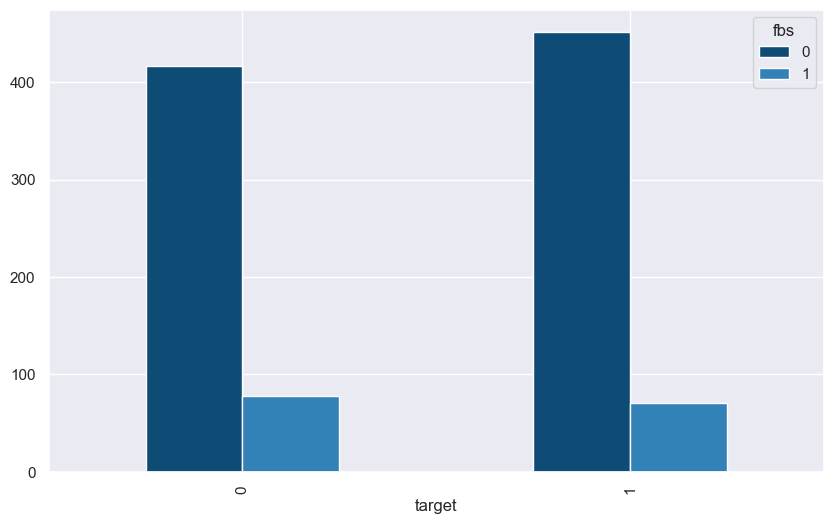

In [9]:
pd.crosstab(heart.target, heart.fbs).plot(kind='bar',
                                   figsize=(10,6),
                                   color=['#0F4C75','#3282B8'])

From the graph, we can tell that amongst those who had fbs higher than 120, fewer have heart disease, while amongst those who had fbs lesser than 120, more had heart disease, which shows that the factor does impact heart disease and would be useful in predicting it.

However, one important thing is that the difference between the number of those having heart disease or not in both categories is not very large, meaning that this may not be a significant factor in predicting target.

#### restecg: resting electrocardiographic results

    Value 0: normal
    Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

<Axes: xlabel='target'>

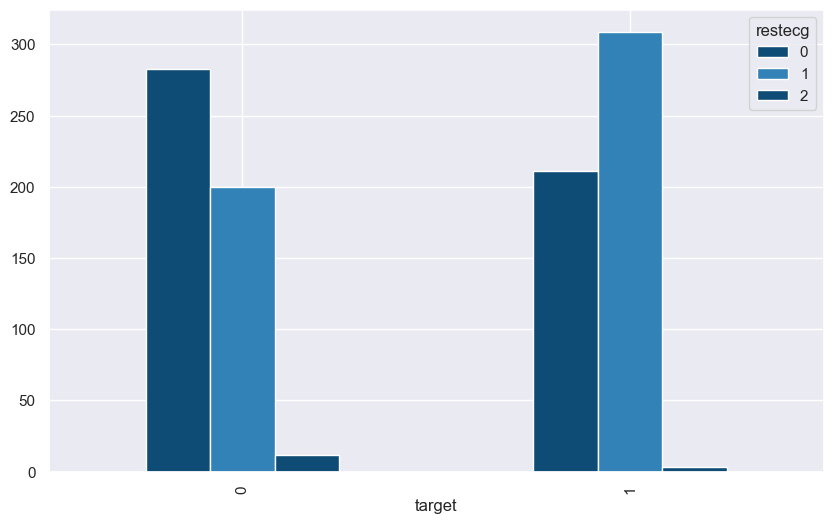

In [10]:
pd.crosstab(heart.target, heart.restecg).plot(kind='bar',
                                   figsize=(10,6),
                                   color=['#0F4C75','#3282B8'])

This is a similar case to cp where, according to the dataset, the presence of Left Ventricular Hypertrophy, which can cause heart problems, only has a small minority of those with the symptom having heart disease. This proves that the resting ecg results may also not be reliable in predicting heart disease. 

At the same time, it's important to note that the sample size for restecg - 3 is very small, which is why the results could be different. Thus, we do not have enough samples in the dataset to determine if restecg is an important factor in predicting heart disease or not.

#### exang: exercise induced angina
	1 = yes
	0 = no

<Axes: xlabel='target'>

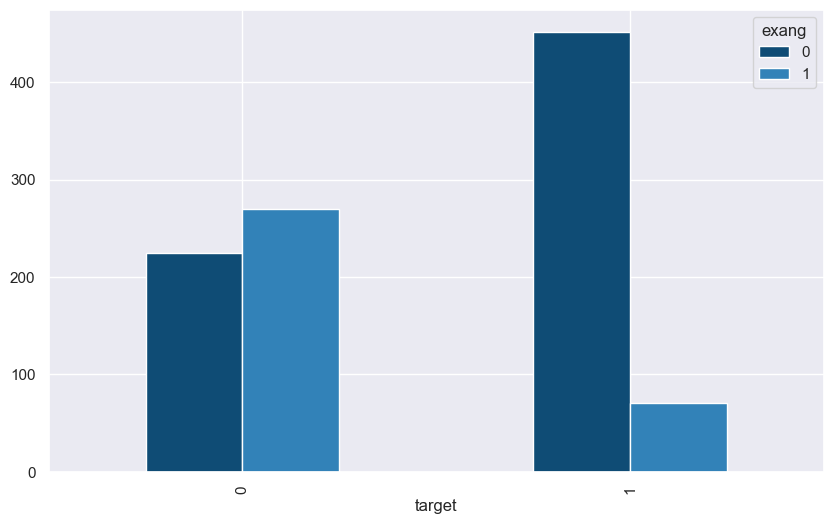

In [11]:
pd.crosstab(heart.target, heart.exang).plot(kind='bar',
                                   figsize=(10,6),
                                   color=['#0F4C75','#3282B8'])

As there is a clear difference between the graphs based on whether the individuals have exang or not, we can say that this is a significant factor in predicting whether one has heart disease or not

#### slope: the slope of the peak exercise ST segment
	Value 0: upsloping
	Value 1: flat
	Value 2: downsloping

<Axes: xlabel='target'>

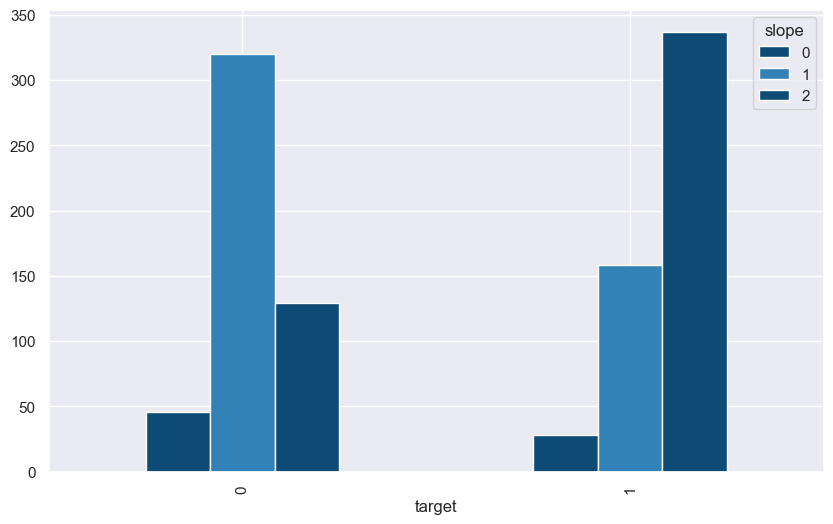

In [12]:
pd.crosstab(heart.target, heart.slope).plot(kind='bar',
                                   figsize=(10,6),
                                   color=['#0F4C75','#3282B8'])

From the graph, we can see that the percentage of those with heart disease increases with the change in the slope, which indicates that slope is an important factor when it comes to predicting whether one has heart disease.

Furthermore, as can be seen with the bar graphs for when target is 1, there is a large jump in the number of people having heart disease for each category, which means that it is quite a significant factor which is important for us to predict the presence of heart disease.

### ca: number of major vessels (0-3) colored by flouroscopy

<Axes: xlabel='target'>

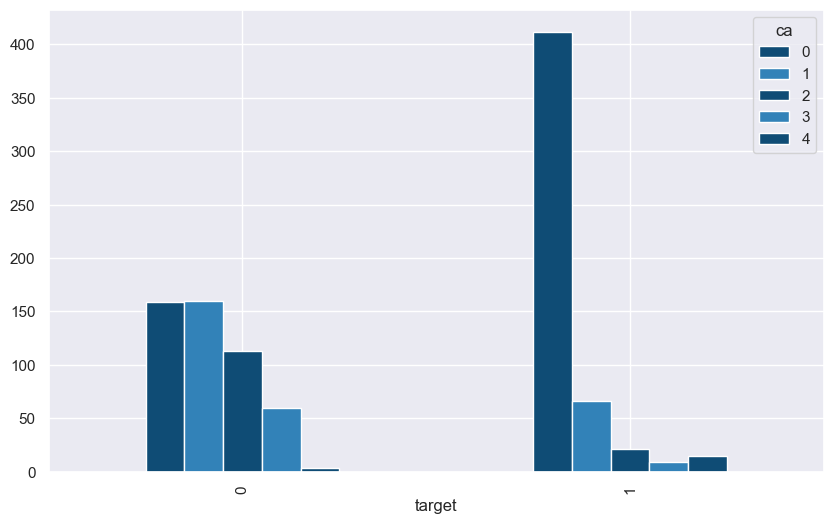

In [13]:
pd.crosstab(heart.target, heart.ca).plot(kind='bar',
                                   figsize=(10,6),
                                   color=['#0F4C75','#3282B8'])

Similar to restecg, the sample size for those who have all 3 major vessels coloured is very small, so we feel that there is not enough data to gauge whether ca is a significant variable in helping to predicting for heart disease.

### thal:
	1 = fixed defect
	2 = normal
	3 = reversable defect

<Axes: xlabel='target'>

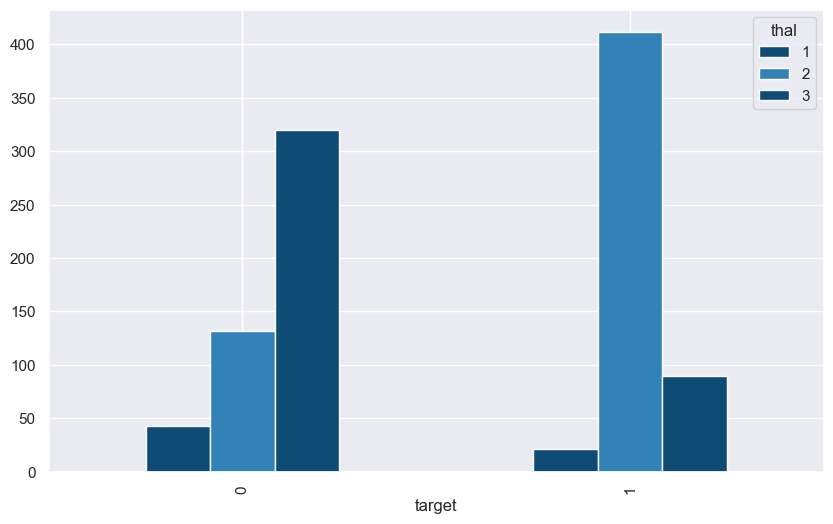

In [14]:
pd.crosstab(heart.target, heart.thal).plot(kind='bar',
                                   figsize=(10,6),
                                   color=['#0F4C75','#3282B8'])

From the data above we can see that individuals who have a heart disease tend to be people without thalassemia hence we shall assume that thalassemia is not a factor that contributes to the presence of a heart disease

Out of the categorical variables, sex, fbs, exang and slope are the ones which affect one's chance of having heart disease. Due to the strong linear relationship between the type of slope of and the presence of a heart disease, it should definitely be considered a significant factor. sex and exang also have a significant enough impact to consider them. However, the different that fbs has on the numbers of people with and without heart disease is very small, so we believe it can be excluded from our test models.

## Data Visualisation
(Factors with highest correlation)

Removing outliers for continuous variables and visualising the categorical ones

In [15]:
slope = pd.DataFrame(heart['slope'])
exang = pd.DataFrame(heart['exang'])
oldpeak = pd.DataFrame(heart['oldpeak'])
thalach = pd.DataFrame(heart['thalach'])
sex = pd.DataFrame(heart['sex'])

Removing the outliers

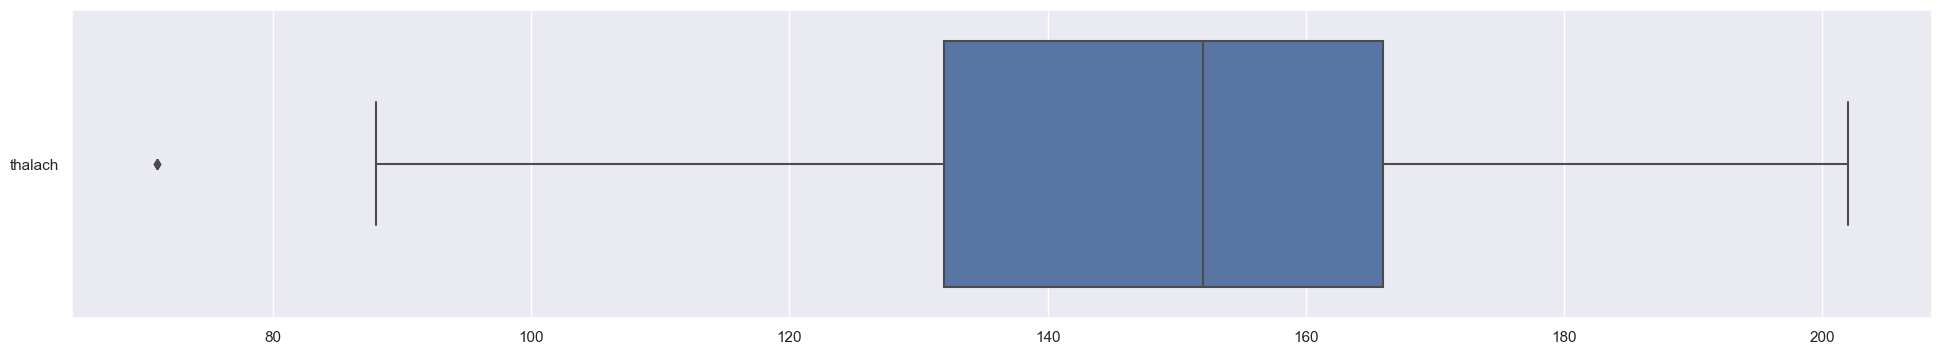

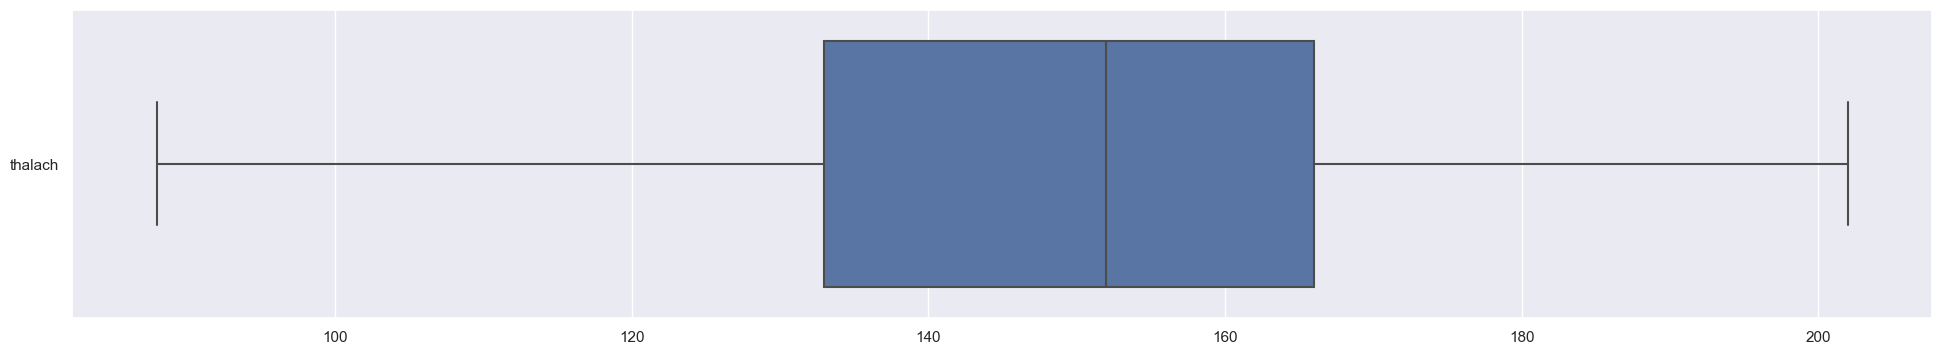

In [16]:
plt.figure(figsize=(24, 4))
sb.boxplot(data=thalach, orient ="h")
plt.show()

# Calculate IQR
Q1 = thalach.quantile(0.25)
Q3 = thalach.quantile(0.75)
IQR = Q3 - Q1

# Define limits for identifying outliers
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# Filter outliers
thalach_filtered = thalach[(thalach >= lower_limit) & (thalach <= upper_limit)]

# Plot boxplot without outliers
plt.figure(figsize=(24, 4))
sb.boxplot(data=thalach_filtered, orient ="h")
plt.show()

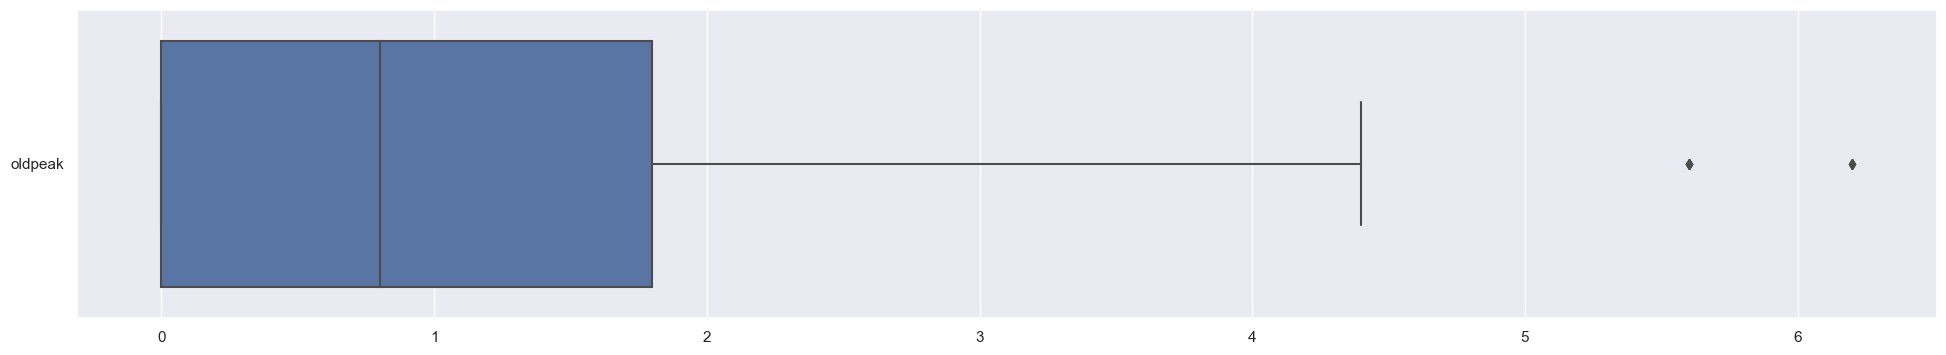

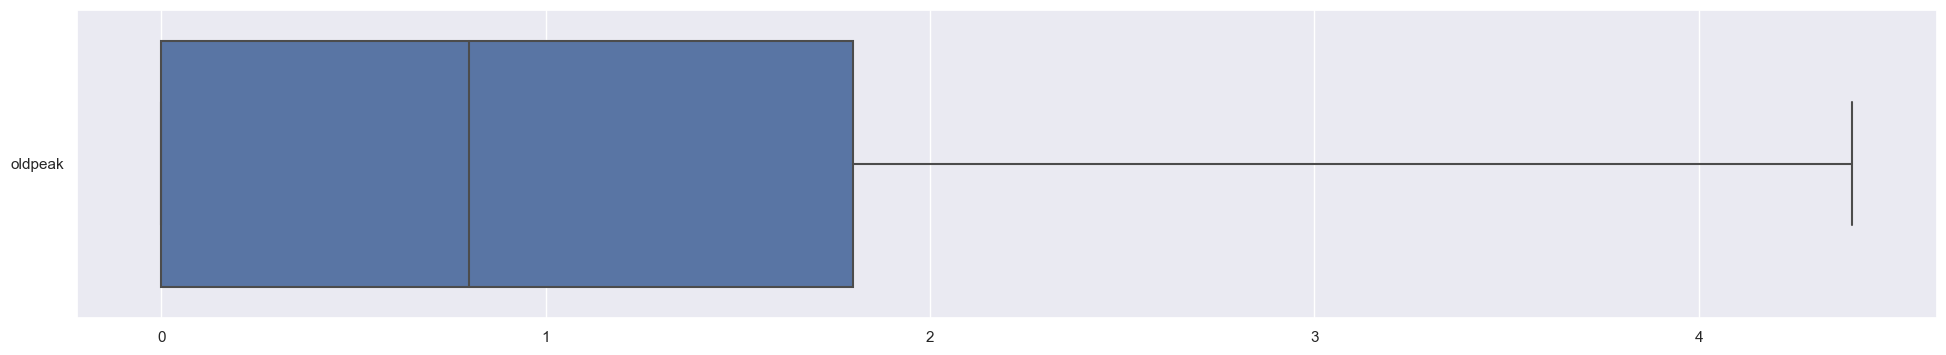

<bound method DataFrame.info of       oldpeak
0         1.0
1         3.1
2         2.6
3         0.0
4         1.9
...       ...
1020      0.0
1021      2.8
1022      1.0
1023      0.0
1024      1.4

[1018 rows x 1 columns]>

In [17]:
f = plt.figure(figsize=(24, 4))
sb.boxplot(data = oldpeak, orient = "h")

# Calculate IQR
Q1 = oldpeak.quantile(0.25)
Q3 = oldpeak.quantile(0.75)
IQR = Q3 - Q1

# Define limits for identifying outliers
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# Filter outliers
oldpeak_filtered = oldpeak[(oldpeak >= lower_limit) & (oldpeak <= upper_limit)]

# Plot boxplot without outliers
plt.figure(figsize=(24, 4))
sb.boxplot(data=oldpeak_filtered, orient ="h")
plt.show()
oldpeak.info

/Users/scar/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


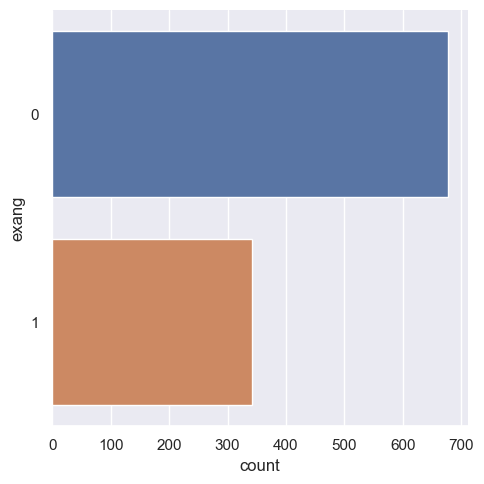

In [20]:
sb.catplot(y = "exang", data = heart, kind = "count")

/Users/scar/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


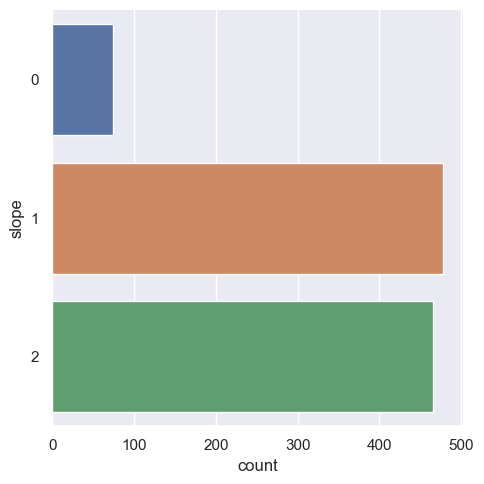

In [21]:
sb.catplot(y = "slope", data = heart, kind = "count")

/Users/scar/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


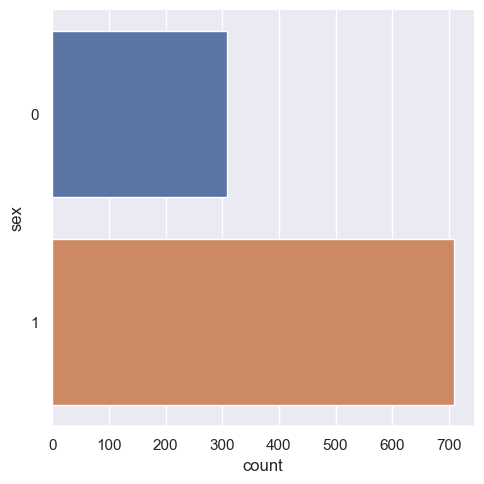

In [31]:
sb.catplot(y = "sex", data = heart, kind = "count")

## Prediction Models

Logistic linear regression model :
is used when the outcome variable is categorical or binary (cp = 0/1/2/3). It models the probability of a certain outcome class based on predictor variables.

K-Nearest Neighbours Classification :
is also used for binary classification problems, especially for relatively smaller datasets like the one being used as it does not require complex training.

Random Forest Classification :
is also used for binary classification problems and uses individual decision trees for each variables and combines them to predict the target variable.

### Logistic regression

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X = heart[['sex', 'thalach', 'oldpeak', 'exang', 'slope']]
y = heart['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.7696078431372549
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.73      0.76       101
           1       0.75      0.81      0.78       103

    accuracy                           0.77       204
   macro avg       0.77      0.77      0.77       204
weighted avg       0.77      0.77      0.77       204

Confusion Matrix:
[[74 27]
 [20 83]]


### K-Nearest Neighbours Classification

In [35]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

X = heart[['sex', 'thalach', 'oldpeak', 'exang', 'slope']]
y = heart['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.7990196078431373
Confusion Matrix:
[[83 18]
 [23 80]]
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.82      0.80       101
           1       0.82      0.78      0.80       103

    accuracy                           0.80       204
   macro avg       0.80      0.80      0.80       204
weighted avg       0.80      0.80      0.80       204



### Random Forest Classification

In [37]:
from sklearn.ensemble import RandomForestClassifier

x = heart[['sex', 'thalach', 'oldpeak', 'exang', 'slope']]
y = heart['target']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
rf_model.fit(x_train, y_train)

y_pred = rf_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.8725490196078431
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.86      0.87       101
           1       0.87      0.88      0.88       103

    accuracy                           0.87       204
   macro avg       0.87      0.87      0.87       204
weighted avg       0.87      0.87      0.87       204

Confusion Matrix:
[[87 14]
 [12 91]]


### Evaluating accuracy of the models

We used a separate test.csv to determine the accuracy of the trained models.

In [58]:
test = pd.read_csv('test.csv')
test.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [62]:
x_train = heart[['sex', 'thalach', 'oldpeak', 'exang', 'slope']]
y_train = heart['target']

x_test = test[['sex', 'thalach', 'oldpeak', 'exang', 'slope']]
y_test = test['target']

np.random.seed(42)

x_train_train, x_train_test, y_train_train, y_train_test = train_test_split(x_train, y_train, test_size=0.2)

In [68]:
logistic_Regression = LogisticRegression(max_iter=1000)
logistic_Regression.fit(x_train_train, y_train_train)
logistic_Regression_value = logistic_Regression.score(x_train_test, y_train_test)

KNN = KNeighborsClassifier()
KNN.fit(x_train_train, y_train_train)
KNN_value = KNN.score(x_train_test, y_train_test)

fci = RandomForestClassifier()
fci.fit(x_train_train, y_train_train)
fci_value = fci.score(x_train_test, y_train_test)

model_result = {
    'logistic_Regression': logistic_Regression_value,
    'KNN': KNN_value,
    'Random Forest': fci_value
}

model_result

{'logistic_Regression': 0.7696078431372549,
 'KNN': 0.7549019607843137,
 'Random Forest': 0.9852941176470589}

From the output above we can see that : random forest achieved the highest accuracy among the three models

Some reasons for the high accuracy of the random forest model :

 - s

## Conclusion

With the high accuracy of the random forest classification model(very close to 1), we belive that the factors we have picked out:

    thalach - maximum heart rate achieved
	exang - presence of exercise induced angina
	sex - sex of patient
    oldpeak - ST depression induced by exercise relative to rest
    slope - Slope of the peak exercise ST segment

are indeed the most important factors which can help us predict whether one has heart disease or not.